# Testy statystyczne

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt

![](https://www.statystyczny.pl/wp-content/uploads/2018/03/mapa-my%C5%9Bli-hipotezy-statystycze.jpg)

https://www.statystyczny.pl/hipotezy-statystyczne/

## Testy parametryczne

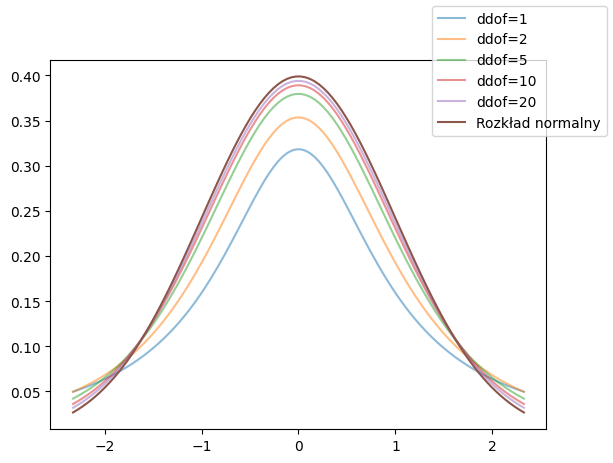

In [213]:
loc=0
scale=1

fig, ax = plt.subplots(1, 1)
data = np.linspace(sps.norm.ppf(0.01, loc=loc, scale=scale), sps.norm.ppf(0.99, loc=loc, scale=scale), 100)
for ddof in [1,2,5,10, 20]:
    ax.plot(data, sps.t.pdf(data, ddof, loc=loc, scale=scale), alpha=0.5, label=f"ddof={ddof}") #(p)robability (d)ensity (f)unction

ax.plot(data, sps.norm.pdf(data, loc=loc, scale=scale), alpha=1, label=f"Rozkład normalny") #(p)robability (d)ensity (f)unction
fig.legend()
plt.show()

### Test t-Studenta (badanie średniej rozkładu)

Wiadomo, że rozkład wyników pomiaru głębokości morza jest rozkładem normalnym. Dokonano 5 pomiarów i wyniki zapisano poniżej.     
```[862, 870, 876, 866, 871]```    
Zweryfikować hipotezę, że w tym miejscu średni poziom głębokości wynosi 870

In [240]:
alpha = 0.05

data = [862, 870, 876, 866, 871]
ttest_1samp_result = sps.ttest_1samp(data, 870)
if ttest_1samp_result.pvalue < alpha:
    print(f"Odrzucamy hipotezę H_0 (p-value={ttest_1samp_result.pvalue:.4%})")
else:
    print(f"Brak podstaw do odrzucenia hipotezy H_0 (p-value={ttest_1samp_result.pvalue:.4%})")

Brak podstaw do odrzucenia hipotezy H_0 (p-value=69.4330%)


In [241]:
ttest_1samp_result

TtestResult(statistic=-0.4225771273642583, pvalue=0.6943303549297284, df=4)

In [242]:
print(f"Średnia: {np.mean(data)} +/- {np.std(data):.2f}")

Średnia: 869.0 +/- 4.73


### Test t-Studenta (porównanie średniej dwóch rozkładów niezależnych)

In [302]:
alpha = 0.01

spec_A = sps.norm.rvs(4, 1.5, 125)
spec_B = sps.norm.rvs(5, 1.8, 80)

ttest_ind_result = sps.ttest_ind(spec_A, spec_B)
if ttest_ind_result.pvalue < alpha:
    print(f"Odrzucamy hipotezę H_0 (p-value={ttest_ind_result.pvalue:.4%})")
else:
    print(f"Brak podstaw do odrzucenia hipotezy H_0 (p-value={ttest_ind_result.pvalue:.4%})")

Odrzucamy hipotezę H_0 (p-value=0.0008%)


In [303]:
ttest_ind_result

Ttest_indResult(statistic=-4.579972915959547, pvalue=8.104657264339094e-06)

In [304]:
print(f"Średnia: {np.mean(spec_A):.2f} +/- {np.std(spec_A):.2f}")

Średnia: 3.98 +/- 1.42


In [305]:
print(f"Średnia: {np.mean(spec_B):.2f} +/- {np.std(spec_B):.2f}")

Średnia: 5.01 +/- 1.76


### Test Levene (równości wariancji)

In [312]:
alpha = 0.01

spec_A_before = sps.norm.rvs(4, 1.5, 125)
spec_A_after =  sps.norm.rvs(5, 1.55, 125)

levene_result = sps.levene(spec_A_before, spec_A_after)
if levene_result.pvalue < alpha:
    print(f"Odrzucamy hipotezę H_0 (p-value={levene_result.pvalue:.4%})")
else:
    print(f"Brak podstaw do odrzucenia hipotezy H_0 (p-value={levene_result.pvalue:.4%})")

Brak podstaw do odrzucenia hipotezy H_0 (p-value=3.7165%)


In [319]:
levene_result

LeveneResult(statistic=4.389996952621941, pvalue=0.03716482021383903)

In [314]:
print(f"Średnia: {np.mean(spec_A_before):.2f} +/- {np.std(spec_A_before):.2f}")

Średnia: 4.00 +/- 1.46


In [315]:
print(f"Średnia: {np.mean(spec_A_after):.2f} +/- {np.std(spec_A_after):.2f}")

Średnia: 4.78 +/- 1.74


### Test t-Studenta (porównanie średniej dwóch rozkładów zależnych)

In [316]:
alpha = 0.01

ttest_rel_result = sps.ttest_rel(spec_A_before, spec_A_after)
if ttest_rel_result.pvalue < alpha:
    print(f"Odrzucamy hipotezę H_0 (p-value={ttest_rel_result.pvalue:.4%})")
else:
    print(f"Brak podstaw do odrzucenia hipotezy H_0 (p-value={ttest_rel_result.pvalue:.4%})")

Odrzucamy hipotezę H_0 (p-value=0.0225%)


In [318]:
ttest_rel_result

TtestResult(statistic=-3.801341379136215, pvalue=0.00022451558515082293, df=124)

## Testy nieparametryczne

### Normalność rozkładu

In [320]:
data = pd.read_csv("../data/napoje.csv", sep=';')

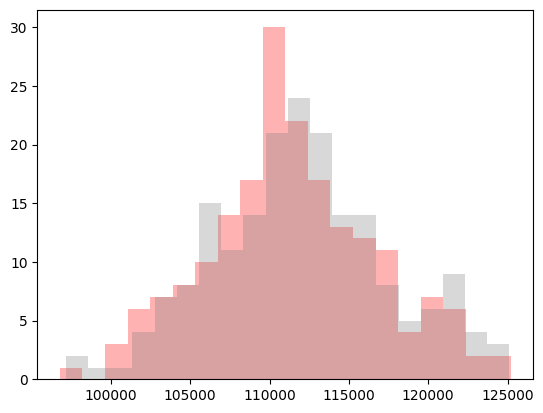

In [329]:
random_sample = sps.norm.rvs(np.mean(data['pepsi']), np.std(data['pepsi']), len(data['pepsi']))

plt.hist(data['pepsi'], bins=20, alpha=0.3, color='red');
plt.hist(random_sample, bins=20, alpha=0.3, color='grey');

In [332]:
alpha = 0.05

normal_results = sps.normaltest(data['pepsi'])
if normal_results.pvalue < alpha:
    print(f"Odrzucamy hipotezę H_0 (p-value={normal_results.pvalue:.4%})")
else:
    print(f"Brak podstaw do odrzucenia hipotezy H_0 (p-value={normal_results.pvalue:.4%})")

Brak podstaw do odrzucenia hipotezy H_0 (p-value=72.0006%)


In [333]:
normal_results

NormaltestResult(statistic=0.656990879516711, pvalue=0.7200062116206445)

In [334]:
print(f"Średnia: {np.mean(data['pepsi']):.2f} +/- {np.std(data['pepsi']):.2f}")

Średnia: 111414.69 +/- 5384.99


In [335]:
print(f"Średnia: {np.mean(random_sample):.2f} +/- {np.std(random_sample):.2f}")

Średnia: 111960.38 +/- 5511.70


### Zgodność dwóch rozkładów

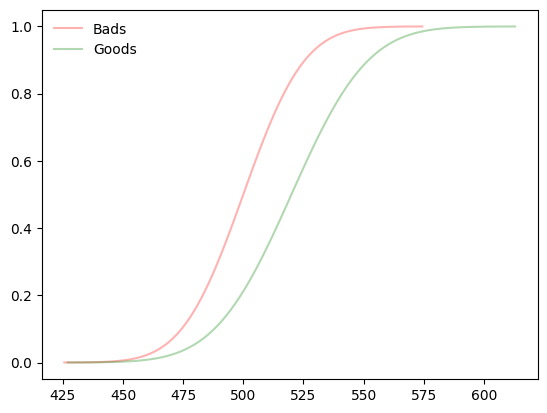

In [339]:
fig, ax = plt.subplots(1, 1)
data1 = np.linspace(sps.norm.ppf(0.0001, loc=500, scale=20), sps.norm.ppf(0.9999, loc=500, scale=20), 100)
data2 = np.linspace(sps.norm.ppf(0.0001, loc=520, scale=25), sps.norm.ppf(0.9999, loc=520, scale=25), 100)

ax.plot(data1, sps.norm.cdf(data1, loc=500, scale=20), 'r-', alpha=0.3, label='Bads') #(c)umulative (d)istribution (f)unction
ax.plot(data2, sps.norm.cdf(data2, loc=520, scale=25), 'g-', alpha=0.3, label='Goods') #(c)umulative (d)istribution (f)unction

ax.legend(frameon=False)
plt.show()

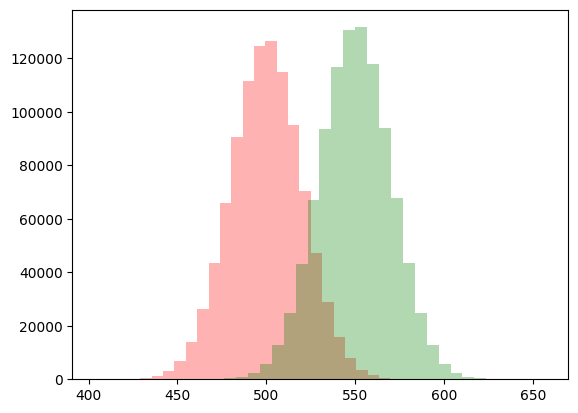

In [362]:
ks_data1 = sps.norm.rvs(loc=500, scale=20, size=1000_000)
ks_data2 = sps.norm.rvs(loc=550, scale=20, size=1000_000)

plt.hist(ks_data1, bins=30, alpha=0.3, color='red');
plt.hist(ks_data2, bins=30, alpha=0.3, color='green');

In [363]:
alpha = 0.05

ks_results = sps.kstest(ks_data1, ks_data2)
if ks_results.pvalue < alpha:
    print(f"Odrzucamy hipotezę H_0 (p-value={ks_results.pvalue:.4%})")
else:
    print(f"Brak podstaw do odrzucenia hipotezy H_0 (p-value={ks_results.pvalue:.4%})")

Odrzucamy hipotezę H_0 (p-value=0.0000%)


In [364]:
ks_results.statistic

0.789113